https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need an area chart comparing sales of multifamily to single family.

Parse dates and set index from pd.read_csv() in jsoncleaner

Want to show autocorrelation between 

Need to find the neighborhoods which experience the largest increase in median price per square foot.

Need to add 2014 data, but it's different from other data.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [22]:
df1= pd.read_csv('nashville_20190813150235.csv', parse_dates = ['Most Recent Sale Date', 'Sale Date'],dtype={'Zone': str, 'Neighborhood': str})

In [27]:
START, END = '2015-01-01', '2019-06'
#df1=df1[df1['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df1['PPS']=df1['Sale Price']/df1['Square Footage Improved']
df1['PPS']=df1['PPS'].replace(np.inf, np.nan)
meanpps=df1.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df1.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)
df=df[df.PPS <= 2000]
df['Assessment Ratio'] = df['Assessment Improvement Improved'] / (df['Assessment Total Improved'])
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

In [28]:
#Creating some useful time variables
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
monthlypps = df.PPS.resample('M').mean()
yearlypps=df.PPS.resample('Y').mean()

In [47]:
table1

Zone,1,2,3,4,5,6,7,8,9
Most Recent Sale Date,,,,,,,,,
2015-03-31,112.451022,185.291798,125.072046,80.792683,83.339436,147.435897,96.829522,97.726085,413.961039
2015-06-30,118.942731,192.097860,115.826929,95.275370,89.170100,155.108998,103.661436,91.019030,344.655624
2015-09-30,120.000000,188.487526,127.051421,86.506872,96.750000,155.131265,109.806590,93.302107,286.491240
2015-12-31,119.274376,177.718833,132.419511,96.450617,91.642853,153.448276,105.257118,97.323800,344.358254
2016-03-31,125.448029,195.595916,152.592593,93.746509,98.561534,153.474903,113.555198,94.696970,341.269841
2016-06-30,129.716981,200.932929,148.000000,96.914370,100.032798,159.903180,116.727697,100.881410,335.681926
2016-09-30,132.919805,200.534759,162.954279,93.928386,103.628510,157.525148,116.332916,105.178857,355.987055
2016-12-31,135.746606,189.141856,167.124542,104.011887,104.865772,156.619385,117.747440,106.540796,379.349046
2017-03-31,135.448916,205.357143,181.623932,94.998061,118.253487,167.261374,123.287671,111.111111,403.645833


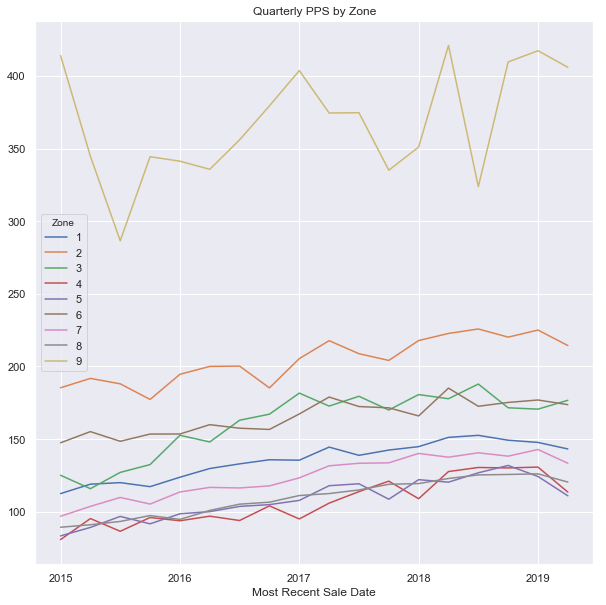

In [15]:
table1 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS').plot(figsize=(10,10), title=('Quarterly PPS by Zone'))
#Clearly Zone 9, the downtown core, is the priciest. It's also the most volatile.
#Zone 2 is the second-highest. We should analyze that because we might fight unique characteristics
#Notably, almost all of the price increase results from these 2 zones.

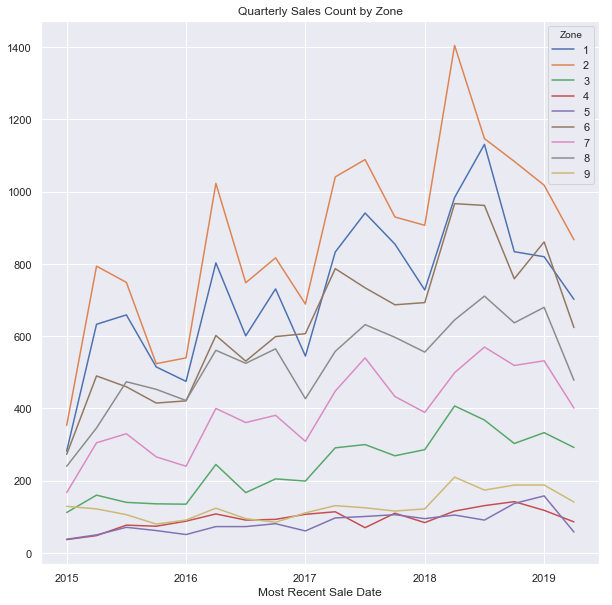

In [16]:
#Want a chart of sale counts by Zone
#Zone 2 shows the most activity.
table2 = df.loc[START:END].groupby('Zone')['PPS']\
.resample('Q').count().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'PPS').plot(figsize=(10,10), title = 'Quarterly Sales Count by Zone')


#There clearly needs to be some element of seasonality in our model, but I have no experience with that.

Text(0.5, 1.0, 'Sale Price over Time')

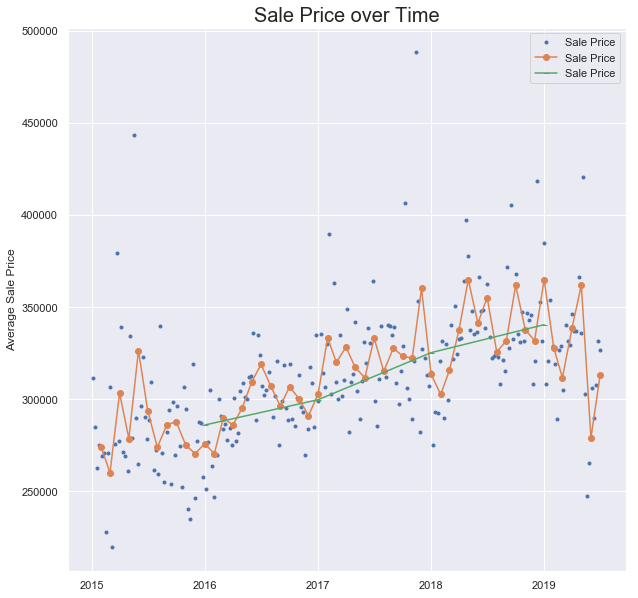

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[START:END],marker='.',linestyle='None')
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
plt.title('Sale Price over Time', fontsize=20)
#Notice the uptick during summer

In [ ]:
#Want a stacked/area graph of sales by Zone and by Housing Type
#sns.lineplot(x=month, y = monthlypps, hue = 'Zone', data = df)

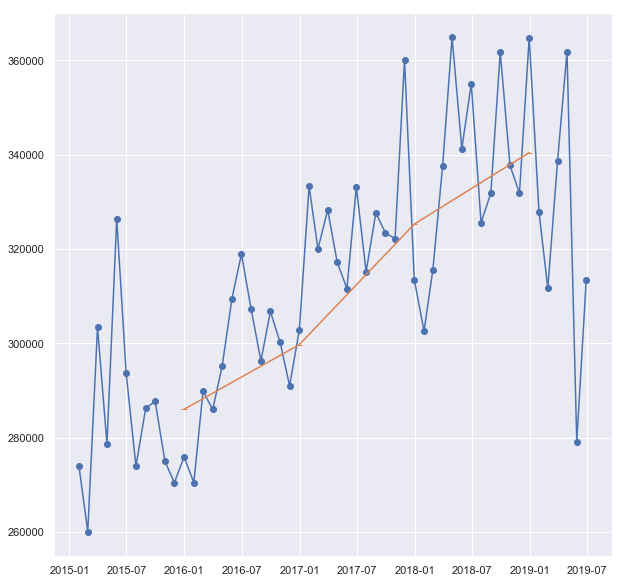

In [19]:
#Plotting PPS through time
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(monthlymean.loc[START:END], marker='o')
ax.plot(yearlymean.loc[START:END], marker='_')

In [41]:
table.columns

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0], dtype='float64', name='Zone')

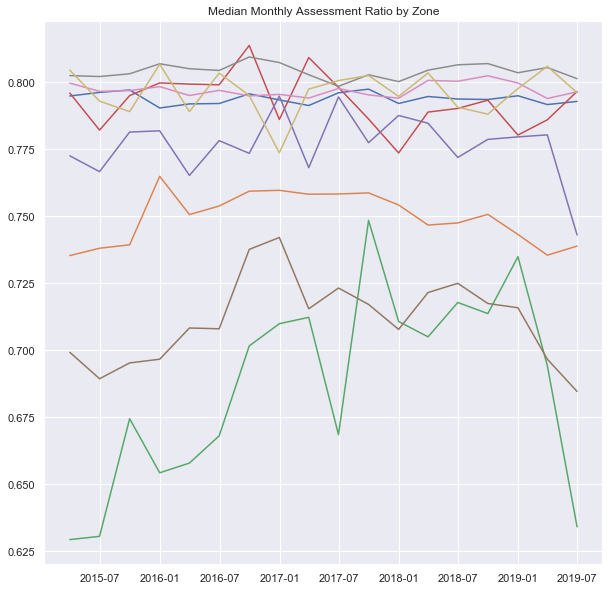

In [46]:
table = df.loc[START:END].groupby('Zone')['Assessment Ratio']\
.resample('Q').median().to_frame()\
.pivot_table(index= 'Most Recent Sale Date',columns= 'Zone', values= 'Assessment Ratio')
plt.figure(figsize=(10,10))
#plot=table.plot()
plt.title('Median Monthly Assessment Ratio by Zone')
#plt.legend()
plt.plot(table)

In [29]:
#.resample('M').mean()
df.groupby(['Sale Date', 'Zone'])['PPS']\
.agg('mean')\
.to_frame()\
.reset_index()\
.pivot_table(index = 'Sale Date', columns= 'Zone', values= 'PPS').head(20)

Zone,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Sale Date,,,,,,,,,
2015-01-02,115.506079,158.380160,102.633991,33.500000,82.268579,102.697001,89.152648,86.606463,431.672633
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.829689,NaN
2015-01-05,111.877653,232.538639,112.512249,NaN,95.681760,111.688912,96.676236,70.554297,347.161886
2015-01-06,90.190589,190.163934,69.908958,NaN,NaN,53.025727,90.966700,77.937575,484.673315
2015-01-07,116.640282,293.801620,79.873685,54.718150,NaN,156.657645,97.640179,96.592394,281.007752
2015-01-08,101.040047,144.479729,120.738636,NaN,NaN,106.544943,94.750088,36.574731,545.862346
2015-01-09,110.029554,165.624536,75.156241,NaN,73.803664,138.277903,87.539943,85.325329,411.181052
2015-01-12,86.684128,142.256914,68.327578,NaN,NaN,237.312833,96.811292,79.501916,480.775430
2015-01-13,109.529040,229.110048,NaN,65.412304,100.126743,141.309284,NaN,77.382178,214.518519


In [31]:
dfz9= df[df.Zone==9]

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


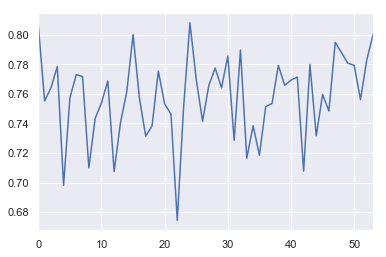

In [32]:
sns.tsplot(dfz9['Assessment Ratio'].loc[START:END].resample('M').mean(), interpolate=True)

In [32]:
# #Amount of sales by month.
# g = sns.factorplot(month, data=df.loc[START:END], aspect=2, kind="count")

In [33]:
# g = sns.factorplot(year, data=df.loc[START:END], aspect=2, kind="count")

                             ARIMA Model Results                              
Dep. Variable:                  D.PPS   No. Observations:                   53
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -202.113
Method:                       css-mle   S.D. of innovations             10.860
Date:                Mon, 19 Aug 2019   AIC                            418.225
Time:                        22:55:07   BIC                            432.017
Sample:                    02-28-2015   HQIC                           423.529
                         - 06-30-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5949      0.448      1.328      0.191      -0.283       1.473
ar.L1.D.PPS    -0.8342      0.135     -6.164      0.000      -1.099      -0.569
ar.L2.D.PPS    -0.6176      0.176     -3.507    

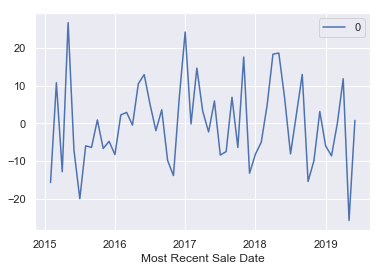

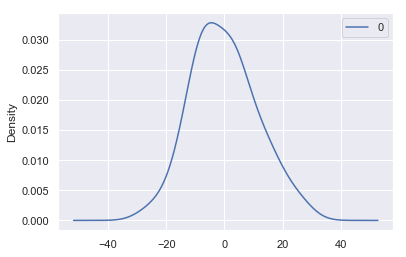

               0
count  53.000000
mean   -0.082986
std    11.136159
min   -25.717243
25%    -8.094246
50%    -0.156123
75%     6.585412
max    26.645910


In [30]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['PPS'].loc[START:END].resample('M').mean().dropna(), order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\Users\alehe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\alehe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.PPS   No. Observations:                  485
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2264.636
Method:                       css-mle   S.D. of innovations             25.793
Date:                Mon, 19 Aug 2019   AIC                           4539.272
Time:                        22:57:24   BIC                           4560.193
Sample:                             1   HQIC                          4547.492
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.0387      3.593      1.680      0.094      -1.004      13.082
Assessment Ratio   -24.2051     15.701     -1.542      0.124     -54.978       6.568
ar.L1.D.PPS          0.0943 

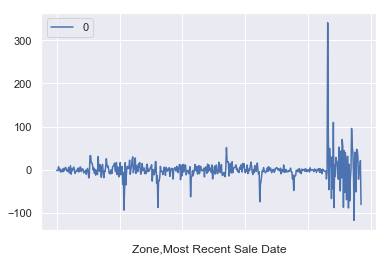

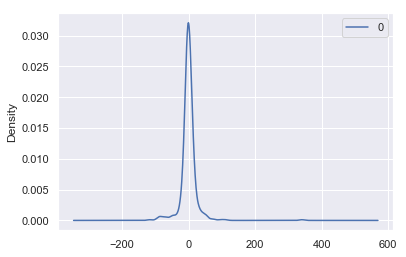

                0
count  485.000000
mean    -0.001430
std     25.819264
min   -116.995275
25%     -5.783657
50%     -0.550302
75%      5.986836
max    340.410196


In [36]:
#Testing impact of Assessment Ratio on price per square foot
df2=df[['Assessment Ratio', 'Zone', 'PPS']].dropna()
ratio = df2.loc[START:END].groupby('Zone')['Assessment Ratio'].resample('M').median()
pps = df2.loc[START:END].groupby('Zone')['PPS']\
.resample('M').median()

model = ARIMA(endog=pps, exog=ratio, order = (1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#